**1. Import Libraries and Load Dataset**

In [ ]:
# Import libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pandas.plotting import parallel_coordinates
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [ ]:
# Import the data 
%cd /content/drive/MyDrive/Pandas
data = pd.read_csv('iris.data.csv', delimiter=',', header=None, skiprows=1, names=['sepal_length','sepal_width','petal_length','petal_width','species'])
data.head()

/content/drive/MyDrive/Pandas


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
print(data.shape)

(150, 5)


In [ ]:
# Summary of each attribute through 'describe' method
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
# Check the class distribution using 'groupby' and 'size':
data.groupby('species').size()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

**2. Train-Test Data Split**

In [ ]:
train, test = train_test_split(data, test_size = 0.4, stratify = data['species'], random_state = 42)
# Note: 40 percent of data to be the test set to ensure there are enough data points to test the models 

# number of instances in each class in training data
train.groupby('species').size() 

species
Iris-setosa        30
Iris-versicolor    30
Iris-virginica     30
dtype: int64

**3. Exploratory Data Analysis**

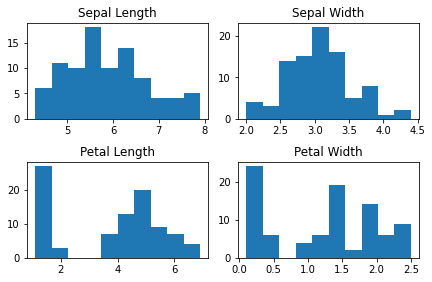

In [ ]:
# Create a Histogram for each feature to examine the distribution of the data points:
n_bins = 10
fig, axs = plt.subplots(2, 2)
axs[0,0].hist(train['sepal_length'], bins = n_bins);
axs[0,0].set_title('Sepal Length');
axs[0,1].hist(train['sepal_width'], bins = n_bins);
axs[0,1].set_title('Sepal Width');
axs[1,0].hist(train['petal_length'], bins = n_bins);
axs[1,0].set_title('Petal Length');
axs[1,1].hist(train['petal_width'], bins = n_bins);
axs[1,1].set_title('Petal Width');
# add some spacing between subplots
fig.tight_layout(pad=1.0);

"Note: for both petal_length and petal_width, there seems to be a group of data points that have smaller values than the others, suggesting that there might be different groups in this data".

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/__init__.py:61: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


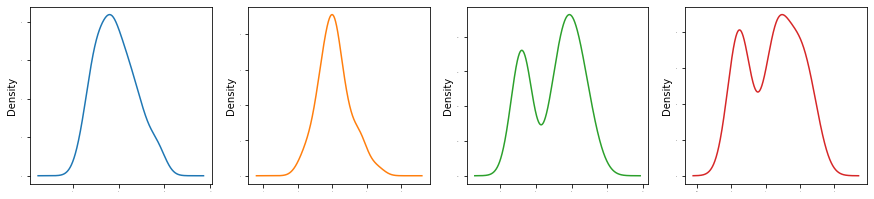

In [ ]:
# Confirm the obove note
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
train.plot(kind='density', subplots=True, layout=(4,4), sharex=False, legend=False, fontsize=1, ax=ax)
plt.show()

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/__init__.py:61: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


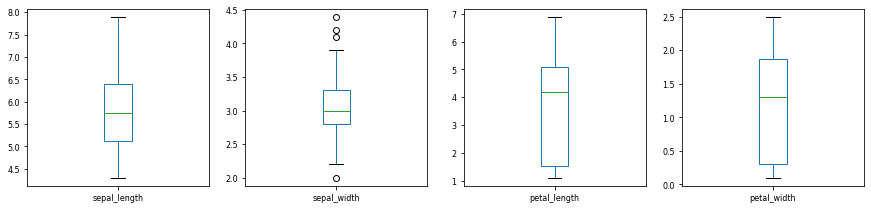

In [ ]:
# Create the boxplots to see the outliers
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
train.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, fontsize=8, ax=ax)
plt.show()

"Note: Three outliers were observed in the sepal_width data"

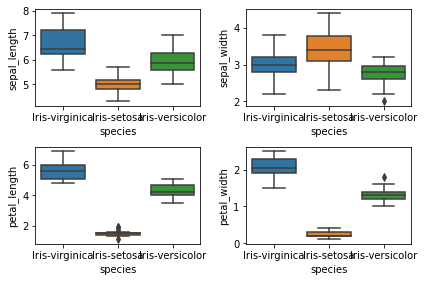

In [ ]:
# boxplots using seaborn
fig, axs = plt.subplots(2, 2)
fn = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
cn = ['setosa', 'versicolor', 'virginica']
sns.boxplot(x = 'species', y = 'sepal_length', data = train, ax = axs[0,0]);
sns.boxplot(x = 'species', y = 'sepal_width', data = train, ax = axs[0,1]);
sns.boxplot(x = 'species', y = 'petal_length', data = train, ax = axs[1,0]);
sns.boxplot(x = 'species', y = 'petal_width', data = train, ax = axs[1,1]);
# add some spacing between subplots
fig.tight_layout(pad=1.0);

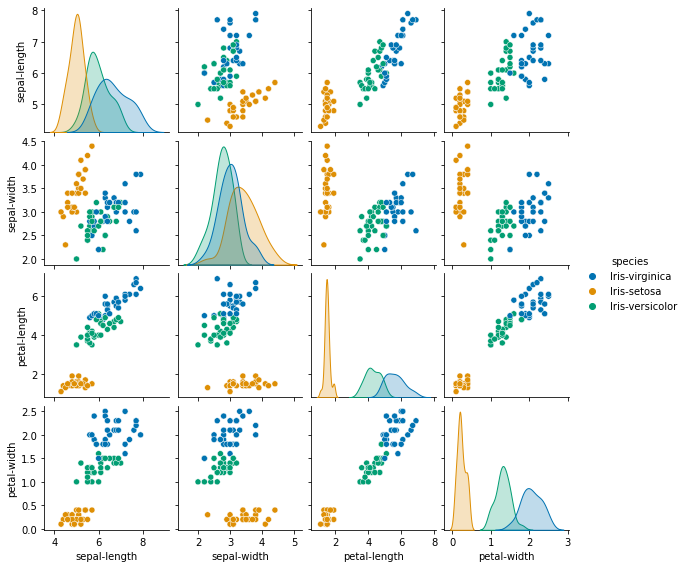

In [ ]:
# Make scatterplots of all-paired attributes by using seaborn’s pairplot function:
sns.pairplot(train, hue="species", height = 2, palette = 'colorblind');

"Note: - Petal_length and petal_width is highly correlated; 
-The petal measurements separate the different species better than the sepal ones"

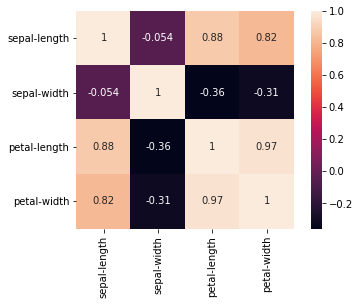

In [ ]:
# Make a correlation matrix to quantitatively examine the relationship between variables
corrmat = train.corr()
sns.heatmap(corrmat, annot = True, square = True);

"Note: Petal measurements (both length and width) have highly positive correlation; - The sepal one have low correlation; -The petal features also have relatively high correlation with sepal_length, but not with sepal_width"

**4. Build Classifiers**

In [ ]:
# Separate out the class label and features:
X_train = train[['sepal_length','sepal_width','petal_length','petal_width']]
y_train = train.species
X_test = test[['sepal_length','sepal_width','petal_length','petal_width']]
y_test = test.species

In [ ]:
# Model 1: Classification Tree
mod_dt = DecisionTreeClassifier(max_depth = 3, random_state = 1)
mod_dt.fit(X_train,y_train)
prediction=mod_dt.predict(X_test)
print('The accuracy of the Decision Tree is',"{:.3f}".format(metrics.accuracy_score(prediction,y_test)))

The accuracy of the Decision Tree is 0.983


In [ ]:
 # See the importance of each predictor through its feature_importances_ attribute:
 mod_dt.feature_importances_

array([0.        , 0.        , 0.42430866, 0.57569134])

"The first two features (sepal measurements) are not important, and only the petal ones are used to build the following tree".

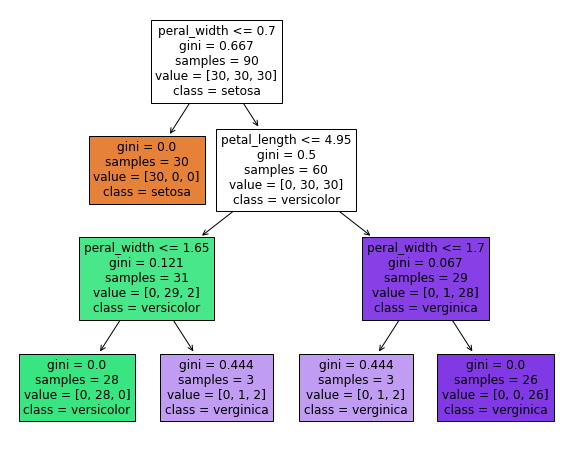

In [ ]:
# Visualize the classification rules through plot_tree:
plt.figure(figsize = (10,8))
plot_tree(mod_dt, feature_names = fn, class_names = cn, filled = True);

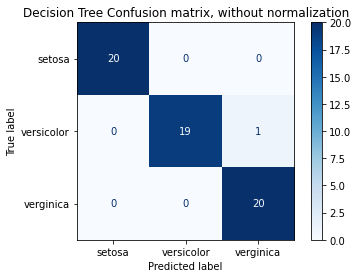

In [ ]:
disp = metrics.plot_confusion_matrix(mod_dt, X_test, y_test,
                                 display_labels=cn,
                                 cmap=plt.cm.Blues,
                                 normalize=None)
disp.ax_.set_title('Decision Tree Confusion matrix, without normalization');

"Note: There is one versicolor which we wrongly predict to be virginica".

In [ ]:
# Model 2: Logistic regression
mod_lr = LogisticRegression(solver = 'newton-cg').fit(X_train, y_train)
prediction=mod_lr.predict(X_test)
print('The accuracy of the Logistic Regression is',"{:.3f}".format(metrics.accuracy_score(prediction,y_test)))

The accuracy of the Logistic Regression is 0.950
